## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

## Variable Declare (User Input)

In [2]:
interval=0.01
upper=60
lower=0

## Temperature Variable Declare (User Input)

In [3]:
svariation=.4
max = 39.6
min = 8.7
starttemp = 26.75
#endtemp = 26.5

## Depth of Carbonation Variable Declare (User Input)

In [4]:
wcratio=0.35

## Matrix Declare

Matrix Size

In [5]:
asize = m.ceil(((upper-lower)/interval)+1)
print(int(asize))

6001


In [6]:
kt = np.zeros(int(asize))
time= np.zeros(int(asize))
co = np.zeros(int(asize))
RH = np.zeros(int(asize))
X = np.zeros(int(asize))
tavg=np.zeros(int(asize))
X1 = np.zeros(int(asize))

## TIME

In [7]:
x=0
#print(time[1980])
for t in np.arange(lower,(upper+interval/2),interval):
 time[x]=t
 x+=1 

In [8]:
print(time)

[0.000e+00 1.000e-02 2.000e-02 ... 5.998e+01 5.999e+01 6.000e+01]


## Temperature Prediction

Average Temperature Variation

In [9]:
x=0
a= starttemp
for t in np.arange(lower,(upper+interval/2),interval):
  tavg[x]= a+ (0.018*t)

  x+=1

<function matplotlib.pyplot.show>

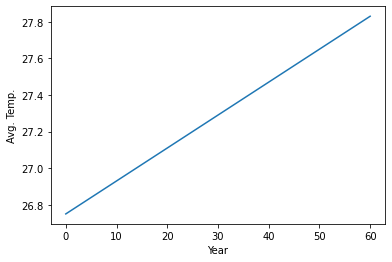

In [10]:
plt.plot(time,tavg)
plt.xlabel("Year")
plt.ylabel("Avg. Temp.")
plt.show

Temperature Values Per Intervals

In [11]:
x=1
y=0
trange1 =(tavg[0]-min)
trange2=(max-tavg[0])
for t in np.arange(lower,(upper+interval/2),interval):
 if ((t-m.floor(t))<=svariation):
  
  kt[y]= tavg[y] - trange1* m.sin (((t- m.floor(t))/svariation)*m.pi)

  
  y+=1
 else :
  kt[y]= tavg[y] + trange2* m.sin(((t- m.floor(t)-svariation)/(1-svariation))*m.pi)
 
  
  y+=1
 x+=1 

In [12]:
print (kt)

[26.75       25.33399332 23.92671791 ... 29.17283075 28.50233704
 27.83      ]


<function matplotlib.pyplot.show>

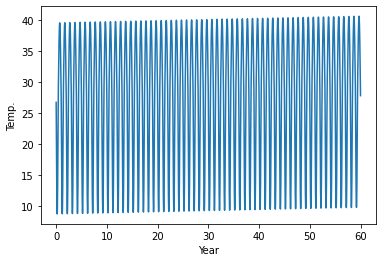

In [13]:
plt.plot(time,kt)
plt.xlabel("Year")
plt.ylabel("Temp.")
plt.show

## CO2 Prediction

In [14]:
x=0
for t in np.arange(lower,(upper+interval/2),interval):
 co[x]= (2.2942*t) + 367.26
 x+=1

In [15]:
print (co)

[367.26     367.282942 367.305884 ... 504.866116 504.889058 504.912   ]


<function matplotlib.pyplot.show>

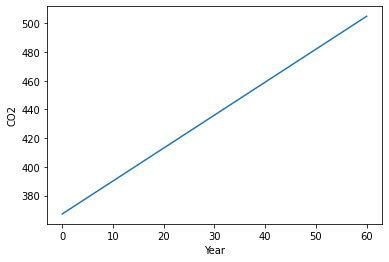

In [16]:
plt.plot(time,co)
plt.xlabel("Year")
plt.ylabel("CO2")
plt.show

## Humidity Prediction

In [17]:
x=0
for t in np.arange(lower, (upper+interval/2),interval):
 
 RH[x]= 50.0 - 0.0363*t
 
 x+=1

In [18]:
print(RH)

[50.       49.999637 49.999274 ... 47.822726 47.822363 47.822   ]


<function matplotlib.pyplot.show>

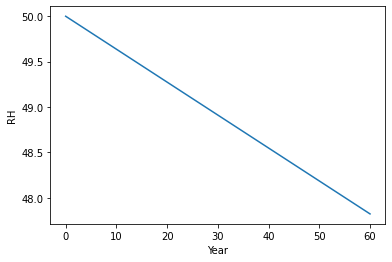

In [19]:
plt.plot(time, RH)
plt.xlabel("Year")
plt.ylabel("RH")
plt.show

## Depth of Carbonation

In [20]:
y=0
z=0
for t in np.arange(lower,(upper+interval/2),interval):
 time[z]=t
 z+=1
 s= m.sqrt(co[y])
 r= m.pow(RH[y],-0.4227)
 k= m.pow(kt[y],0.7154)
 w= m.pow(.35,1.3401)
 
 a1=m.sqrt(t)
  
 if (y>0):
  u=X[y-1]/(0.3785*s*k*r*w)
  v=m.pow(u,2)
  q=v+interval
  X[y] =  0.3785*s*k*r*w*m.sqrt(q)
  #Xc[y] = 0.3785*s*k*r*w*m.sqrt(t)
  #print(X[y],Xc[y])
 else :
  X[y] =  0.3785*s*k*r*w*a1
 y+=1

In [21]:
print(X)

[ 0.          0.34326392  0.47583178 ... 31.89741474 31.90053517
 31.90355069]


<function matplotlib.pyplot.show>

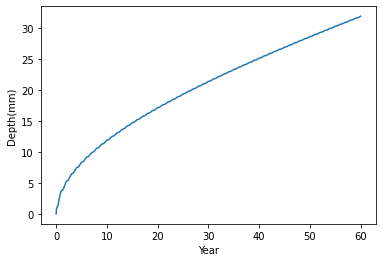

In [22]:
plt.plot(time,X)
plt.xlabel("Year")
plt.ylabel("Depth(mm)")
plt.show